These scripts are written for AnimalBiome (animalbiome.com).

This notebook was used to generate plots of cat microbiomes, displayed at different taxonomic levels. Data is from the sequencing-based micribiome assessments AnimalBiome provides, it lists each microbe and it's proportion in the sample, identified to genus. The plots were used as part of the microbiome assessment reports returned to the customers.

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
otu_L6 = pd.read_table('path/otu_table_L6.txt') #Genus
otu_L5 = pd.read_table('path/otu_table_L5.txt') #Family
otu_L4 = pd.read_table('path/otu_table_L4.txt') #Order
otu_L3 = pd.read_table('path/otu_table_L3.txt') #Class
otu_L2 = pd.read_table('path/otu_table_L2.txt') #Phylum

In [155]:
#Selecting out a target cat using its sample ID number
catID = '1473'

#L6 (Smallest category - Genus)
cat_L6 = otu_L6[['#OTU_ID', catID]]
cat_L6_1 = cat_L6[cat_L6[catID] > 0]
cat_L6_2 = cat_L6_1.sort_values([catID], ascending = False)

#L5 (Family)
cat_L5 = otu_L5[['#OTU_ID', catID]]
cat_L5_1 = cat_L5[cat_L5[catID] > 0]
cat_L5_2 = cat_L5_1.sort_values([catID], ascending = False)

#L4 (Order)
cat_L4 = otu_L4[['#OTU_ID', catID]]
cat_L4_1 = cat_L4[cat_L4[catID] > 0]
cat_L4_2 = cat_L4_1.sort_values([catID], ascending = False)

#L3 (Class)
cat_L3 = otu_L3[['#OTU_ID', catID]]
cat_L3_1 = cat_L3[cat_L3[catID] > 0]
cat_L3_2 = cat_L3_1.sort_values([catID], ascending = False)

#L2 (Broadest category - Phylum)
cat_L2 = otu_L2[['#OTU_ID', catID]]
cat_L2_1 = cat_L2[cat_L2[catID] > 0]
cat_L2_2 = cat_L2_1.sort_values([catID], ascending = False)

print ('Number of genera (L6 taxonomic units) for the target cat: %s' % len(cat_L6_2))
print ('Number of families (L5 taxonomic units) for the target cat: %s' % len(cat_L5_2))
print ('Number of orders (L4 taxonomic units) for the target cat: %s' % len(cat_L4_2))
print ('Number of classes (L3 taxonomic units) for the target cat: %s' % len(cat_L3_2))
print ('Number of phyla (L2 taxonomic units) for the target cat: %s' % len(cat_L2_2))
cat_L5_2.head()

Number of genera (L6 taxonomic units) for the target cat: 25
Number of families (L5 taxonomic units) for the target cat: 15
Number of orders (L4 taxonomic units) for the target cat: 8
Number of classes (L3 taxonomic units) for the target cat: 7
Number of phyla (L2 taxonomic units) for the target cat: 4


,#OTU_ID,1473
7,Prevotellaceae,0.5046
5,Bacteroidaceae,0.2938
35,Lachnospiraceae,0.0484
26,Lactobacillaceae,0.0422
38,Ruminococcaceae,0.0272


In [133]:
# labels_L2 = pie_L2['#OTU_ID'].iloc[0:3]
# labels_L2.head()


pieL2_catID.head()

2    0.5202
6    0.3796
7    0.0902
1    0.0060
8    0.0040
Name: 1433, dtype: float64

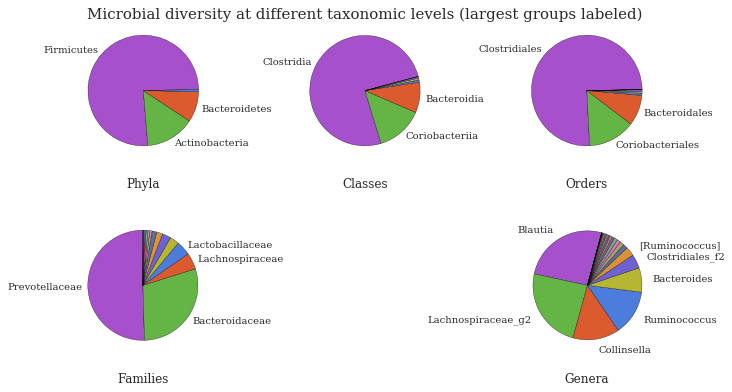

In [156]:
#set up the figure
fig=plt.figure()
fig.set_size_inches(12,8)
sns.set(font='serif')

#Create the figure with two rows and three columns. Figsize will define the figure size
#create subplot panels, define colors
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
colors = ["#a651cb","#64b546","#db5b2f","#4c7cdc","#b6b633","#6e62d3","#d99234","#5d6bab",
          "#a6a758","#e26fd0","#5ab880","#e53580","#3dbbb8","#ce3b46","#62a3da","#a2522e",
          "#b891e2","#497938","#b4398f","#846e29","#8a549e","#d89767","#d85481","#db7a76","#d687b6","#9b4863"]

#Create first pie chart with labels (labels only shown if > 0.02, or stored 
#as blank strings ''. The value can be tweaked depending on the data set)
labels2 = [n if v > 0.02 else ''
            for n, v in zip(cat_L2_2['#OTU_ID'], cat_L2_2[catID])]
pieL2 = ax1.pie(cat_L2_2[catID], colors=colors, labels = labels2, startangle=1) #autopct='%1.1f%%'
ax1.set_xlabel('Phyla', fontsize = 12)
ax1.axis('equal')
 
# Same as above, for the second pie chart
labels3 = [n if v > 0.02 else ''
            for n, v in zip(cat_L3_2['#OTU_ID'], cat_L3_2[catID])]
pieL3 = ax2.pie(cat_L3_2[catID], colors=colors, labels = labels3, startangle=15)
ax2.set_xlabel('Classes', fontsize = 12)
ax2.axis('equal')

# # Same as above, for the third pie chart
labels4 = [n if v > 0.02 else ''
            for n, v in zip(cat_L4_2['#OTU_ID'], cat_L4_2[catID])]
pieL4 = ax3.pie(cat_L4_2[catID], colors=colors, labels = labels4, startangle=1)
ax3.set_xlabel('Orders', fontsize = 12)
ax3.axis('equal')

# # Same as above, for the fourth pie chart
labels5 = [n if v > 0.03 else ''
            for n, v in zip(cat_L5_2['#OTU_ID'], cat_L5_2[catID])]
pieL5 = ax4.pie(cat_L5_2[catID], colors=colors, labels = labels5, startangle=90)
ax4.set_xlabel('Families', fontsize = 12)
ax4.axis('equal')

# # Leave ax5 blank
ax5.axis('off')

##Same as above for last pie chart
labels6 = [n if v > 0.02 else ''
            for n, v in zip(cat_L6_2['#OTU_ID'], cat_L6_2[catID])]
pieL6 = ax6.pie(cat_L6_2[catID], colors=colors, labels = labels6, startangle=75, labeldistance=1.2)
ax6.set_xlabel('Genera', fontsize = 12)
ax6.axis('equal')

# Adjust the space between the two charts
plt.tight_layout()
plt.subplots_adjust(wspace=1)
fig.suptitle('Microbial diversity at different taxonomic levels (largest groups labeled)', fontsize=15)

plt.show()
fig.savefig('1473_taxonomic_diversity.png', bbox_inches='tight')